In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
Wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6             0.230         0.40            4.20      0.035   
12              7.9             0.180         0.37            1.20      0.040   
13              6.6             0.160         0.40            1.50      0.044   
14              8.3             0.420         0.62           19.25      0.040   
15              6.6             0.170         0.38            1.50      0.032   
16              6.3             0.480         0.04            1.10      0.046   
17              6.2             0.660         0.48            1.20      0.029   
18              7.4             0.340         0.42            1.10      0.033   
19              6.5             0.310         0.14            7.50      0.044   
20              6.2             0.660         0.48            1.20      0.029   
21              6.4             0.310         0.38            2.90      0.038   
22              6.8             0.260         0.42            1.70      0.049   
23              7.6             0.670         0.14            1.50      0.074   
24              6.6             0.270         0.41            1.30      0.052   
25              7.0             0.250         0.32            9.00      0.046   
26              6.9             0.240         0.35            1.00      0.052   
27              7.0             0.280         0.39            8.70      0.051   
28              7.4             0.270         0.48            1.10      0.047   
29              7.2             0.320         0.36            2.00      0.033   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [5]:
print(Wine.shape)

(4898, 12)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
Wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

In [8]:
x=Wine.iloc[:,:-1]
y=Wine.iloc[:, 11]

In [9]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6             0.230         0.40            4.20      0.035   
12              7.9             0.180         0.37            1.20      0.040   
13              6.6             0.160         0.40            1.50      0.044   
14              8.3             0.420         0.62           19.25      0.040   
15              6.6             0.170         0.38            1.50      0.032   
16              6.3             0.480         0.04            1.10      0.046   
17              6.2             0.660         0.48            1.20      0.029   
18              7.4             0.340         0.42            1.10      0.033   
19              6.5             0.310         0.14            7.50      0.044   
20              6.2             0.660         0.48            1.20      0.029   
21              6.4             0.310         0.38            2.90      0.038   
22              6.8             0.260         0.42            1.70      0.049   
23              7.6             0.670         0.14            1.50      0.074   
24              6.6             0.270         0.41            1.30      0.052   
25              7.0             0.250         0.32            9.00      0.046   
26              6.9             0.240         0.35            1.00      0.052   
27              7.0             0.280         0.39            8.70      0.051   
28              7.4             0.270         0.48            1.10      0.047   
29              7.2             0.320         0.36            2.00      0.033   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3749            6.3              0.28         0.29             6.8      0.051   
1344            7.3              0.23         0.37             1.9      0.041   
58              6.6              0.38         0.15             4.6      0.044   
3177            5.6              0.41         0.22             7.1      0.050   
3942            7.2              0.23         0.39             1.5      0.053   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3749                 40.0                 143.0  0.99374  3.43       0.59   
1344                 51.0                 165.0  0.99080  3.26       0.40   
58                   25.0                  78.0  0.99310  3.11       0.38   
3177                 44.0                 154.0  0.99310  3.30       0.40   
3942                 26.0                 106.0  0.99166  3.18       0.47   

      alcohol  
3749     11.0  
1344     12.2  
58       10.2  
3177     10.5  
3942     11.1

In [11]:
y_train.head()

3749    6
1344    8
58      6
3177    5
3942    6
Name: quality, dtype: int64

In [12]:
x_train.shape
x_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2414            6.2              0.38         0.18             7.4      0.095   
1584            6.4              0.25         0.74             7.8      0.045   
3248            6.4              0.25         0.37             4.5      0.039   
645             6.3              0.26         0.25             7.8      0.058   
3163            7.1              0.36         0.37             4.8      0.019   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2414                 28.0                 195.0  0.99773  3.53       0.71   
1584                 52.0                 209.0  0.99560  3.21       0.42   
3248                 41.0                 147.0  0.99210  3.18       0.40   
645                  44.0                 166.0  0.99610  3.24       0.41   
3163                 39.0                 114.0  0.99036  3.08       0.49   

      alcohol  
2414      9.2  
1584      9.2  
3248     11.1  
645       9.0  
3163     12.7

In [13]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train, y_train)

C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = model.predict(x_test)

In [35]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 480
Accuracy: 0.51


In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print ('Below is the confusion matrix')
print(cnf_matrix) #are incorrect predictions

Below is the confusion matrix
[[  0   0   1   1   0   0]
 [  0   0  18  10   1   0]
 [  0   0 142 149   2   0]
 [  0   0  85 342   8   0]
 [  0   0   3 165  16   0]
 [  0   0   0  33   4   0]]


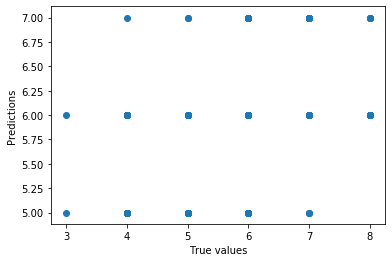

In [18]:
predictions = model.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

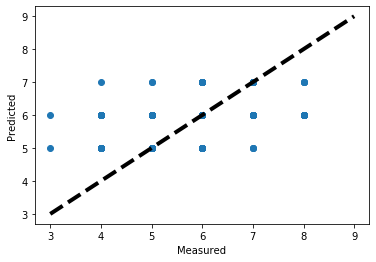

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
new_observation=[6.7,0.15,0.38,1.7,0.037,20,84,0.99046,3.09,0.53,11.4]

In [21]:
y_pred = model.predict([new_observation])

In [22]:
probability = model.predict_proba([new_observation])

In [24]:
print('Qualit for the given values is :', y_pred)
print('Probability of the given value :', probability)

Qualit for the given values is : [6]
Probability of the given value : [[0.00175088 0.01877682 0.07069022 0.55032964 0.31140483 0.04618601
  0.0008616 ]]


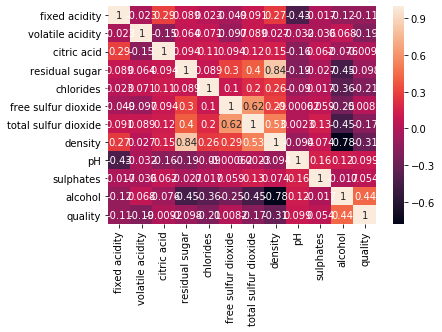

In [27]:
import seaborn as sns
corr=Wine.corr()
sns.heatmap(corr, annot = True)